In [1]:
# !pip install seaborn

## Import Libraries

In [82]:
import os

# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

## Define the Path of the data

In [83]:
IMAGE_PATH = "../input/data"
TRAIN_IMAGE_PATH = os.path.join(IMAGE_PATH, 'train/images')
TEST_IMAGE_PATH = os.path.join(IMAGE_PATH, 'eval/images')
# print(TRAIN_IMAGE_PATH, TEST_IMAGE_PATH)

## Create an array that shows label for each data's path
if 특정단어 in string - https://anweh.tistory.com/15


In [84]:
def find_label(path, image):
    label = -1
    personID, gender, _, age = path.split('/')[-1].split('_')
    
    ## label 'not wear' - 12 ~ 17
    if 'normal' in image:
        if gender == "male":
            if int(age) < 30:   label = 12
            elif int(age) < 60: label = 13
            else:          label = 14
        else:
            if int(age) < 30:   label = 15
            elif int(age) < 60: label = 16
            else:          label = 17
            
    ## label 'incorrect' - 6 ~ 11
    elif 'incorrect' in image:
        if gender == "male":
            if int(age) < 30:   label = 6
            elif int(age) < 60: label = 7
            else:          label = 8
        else:
            if int(age) < 30:   label = 9
            elif int(age) < 60: label = 10
            else:          label = 11
        
    ## label 'wear' - 0 ~ 5
    else:
        if gender == "male":
            if int(age) < 30:   label = 0
            elif int(age) < 60: label = 1
            else:          label = 2
        else:
            if int(age) < 30:   label = 3
            elif int(age) < 60: label = 4
            else:          label = 5
    
    ## check whether the data has been properly inserted
    # print(label, image, gender, age)

    return label

In [85]:
individual_train_path = []
tmp = []

# count = 0
for path in os.walk(TRAIN_IMAGE_PATH):     
    ## current path
    img_path = path[0]  

    if img_path.split('/')[-1] == "images":
        continue
    
    ## name of files inside the current path
    inner_path = os.listdir(img_path)
    
#     print("img_path:", img_path)     ## check img_path
#     print("inner_path:", inner_path) ## check inner_path
        
    for image in inner_path:
        if image[0] != '.':
            final_path = os.path.join(img_path, image)
#             tmp.append(image)
#             print("final_path:",final_path)
            label = find_label(img_path, image)
            column = {'img_path':final_path, 'label': label}
            individual_train_path.append(column)
    
    # break

## To check all the possible labels
# print(sorted(list(set(tmp))))

## Check Data
individual_train_path[:5]

[{'img_path': '../input/data/train/images/001520_female_Asian_47/mask1.jpg',
  'label': 4},
 {'img_path': '../input/data/train/images/001520_female_Asian_47/incorrect_mask.jpg',
  'label': 10},
 {'img_path': '../input/data/train/images/001520_female_Asian_47/mask2.jpg',
  'label': 4},
 {'img_path': '../input/data/train/images/001520_female_Asian_47/normal.jpg',
  'label': 16},
 {'img_path': '../input/data/train/images/001520_female_Asian_47/mask4.jpg',
  'label': 4}]

In [86]:
individual_test_path = []
tmp = []

for path in os.walk(TEST_IMAGE_PATH):     
    ## current path
    img_path = path[0]

    for image in path[2]:
        if image[0] != '.':
            final_path = os.path.join(img_path, image)
            label = -1
            column = {'img_path':final_path, 'label': label}
            individual_test_path.append(column)

## Check Data
individual_test_path[:5]

[{'img_path': '../input/data/eval/images/dd5a58356f1a8784d90cf46ad8b0631240d40730.jpg',
  'label': -1},
 {'img_path': '../input/data/eval/images/15d0255493af42f0049610ee310a843810303fae.jpg',
  'label': -1},
 {'img_path': '../input/data/eval/images/19cc80d3027cf21ff5048eecc1f27d8b65de26e1.jpg',
  'label': -1},
 {'img_path': '../input/data/eval/images/0b86db5626caf284d4ce10e9afc7e32683dd380c.jpg',
  'label': -1},
 {'img_path': '../input/data/eval/images/08f5389b4490ad4b48632fb431537a714a95a314.jpg',
  'label': -1}]

In [87]:
## individual_path is dictionary. make it to dataframe so we can use it

traindataset = pd.DataFrame(individual_train_path)
traindataset = traindataset.sort_values(['label','img_path'])
traindataset = traindataset.reset_index(drop=True)    

testdataset = pd.DataFrame(individual_test_path)
testdataset = testdataset.reset_index(drop=True)  

## check whether the data has transformed into DataFrame
print(traindataset.sample(5))
print(testdataset.sample(5))

                                                img_path  label
1233   ../input/data/train/images/005250_male_Asian_2...      0
9502   ../input/data/train/images/000531_female_Asian...      4
14063  ../input/data/train/images/000237_male_Asian_5...      7
15967  ../input/data/train/images/005016_female_Asian...     10
8722   ../input/data/train/images/006541_female_Asian...      3
                                               img_path  label
4216  ../input/data/eval/images/93ef67c042f9415d74dd...     -1
5386  ../input/data/eval/images/5f4d3d6aeef3560052b3...     -1
7550  ../input/data/eval/images/f1b23f827ce59aa0121e...     -1
9112  ../input/data/eval/images/498677be4e1014bac7ae...     -1
1151  ../input/data/eval/images/6707950f0367c66b1445...     -1


## Divide train to train & val
value_counts - https://bigdaheta.tistory.com/46

In [88]:
traindataset['label'].value_counts()

4     4085
3     3660
0     2745
1     2050
16     817
10     817
15     732
9      732
12     549
6      549
5      545
2      415
7      410
13     410
11     109
17     109
8       83
14      83
Name: label, dtype: int64

In [91]:
# trainpath = []
# valpath = []

# label_count = traindataset['label'].value_counts()

# for i in range(len(label_count)):
#     cut = int(label_count[i]*0.8)
#     count = 0
#     elsecount = 0
#     for j in range(len(traindataset)):
#         if traindataset['label'][j] == i and count < cut:
#             label = i
#             column = {'img_path':traindataset['img_path'][j], 'label': label}
#             trainpath.append(column)
#             count += 1
#         elif traindataset['label'][j] == i and count >= cut:
#             label = i
#             column = {'img_path':traindataset['img_path'][j], 'label': label}
#             valpath.append(column)
#             elsecount += 1
#     print(count, elsecount, count+elsecount, label_count[i])

In [89]:
trainpath = []
valpath = []

label_count = traindataset['label'].value_counts()

for i in range(len(label_count)):
    cut = int(label_count[i]*0.8)
    count = 0
    traincount = 0
    evalcount = 0
    for j in range(len(traindataset)):
        if traindataset['label'][j] == i:
            if count == 4:
                label = i
                column = {'img_path':traindataset['img_path'][j], 'label': label}
                valpath.append(column)
                count = 0
                evalcount += 1
                continue
            label = i
            column = {'img_path':traindataset['img_path'][j], 'label': label}
            trainpath.append(column)
            count += 1
            traincount += 1
#     print(traincount, evalcount, traincount+evalcount, label_count[i])

2196 549 2745 2745
1640 410 2050 2050
332 83 415 415
2928 732 3660 3660
3268 817 4085 4085
436 109 545 545
440 109 549 549
328 82 410 410
67 16 83 83
586 146 732 732
654 163 817 817
88 21 109 109
440 109 549 549
328 82 410 410
67 16 83 83
586 146 732 732
654 163 817 817
88 21 109 109


In [92]:
## Check Data
# print(trainpath[:20])
# print()
# print(valpath[:20])

In [93]:
traindataset = pd.DataFrame(trainpath)
traindataset = traindataset.sort_values(['label','img_path'])
traindataset = traindataset.reset_index(drop=True)   

valdataset = pd.DataFrame(valpath)
valdataset = valdataset.sort_values(['label','img_path'])
valdataset = valdataset.reset_index(drop=True)   

## Save the datasets in .csv
save in csv - https://hleecaster.com/python-pandas-creating-and-loading-dataframes/

In [94]:
traindataset.to_csv('train_data.csv')

In [95]:
valdataset.to_csv('val_data.csv')

In [96]:
testdataset.to_csv('test_data.csv')

## informations about the data

In [97]:
# traindataset.info()

In [98]:
# valdataset.info()

In [99]:
# testdataset.info()

In [100]:
traindataset.count()

img_path    15126
label       15126
dtype: int64

In [101]:
valdataset.count()

img_path    3774
label       3774
dtype: int64

In [102]:
testdataset.count()

img_path    12600
label       12600
dtype: int64

In [103]:
print(traindataset['label'].value_counts()[0], valdataset['label'].value_counts()[0])

2196 549


In [74]:
valdataset['label'].value_counts()

4     654
3     586
0     439
1     328
10    131
16    131
9     117
15    117
12     88
6      88
5      87
2      67
7      66
13     66
11     18
17     18
14     13
8      13
Name: label, dtype: int64

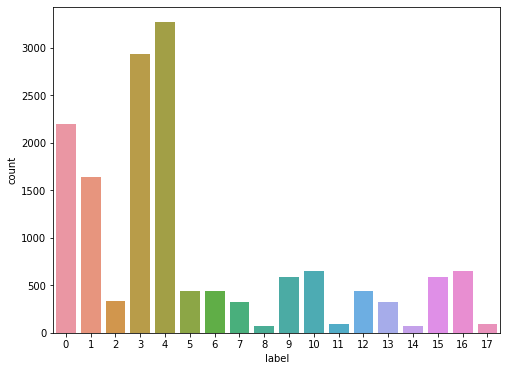

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='label', data=traindataset)
plt.show()

## See image and the characteristics of image
image show - https://wikidocs.net/153080   
random number - http://pythonstudy.xyz/python/article/509-%EB%82%9C%EC%88%98-random

../input/data/train/images/004430_male_Asian_18/mask4.jpg
JPEG
(384, 512)
RGB


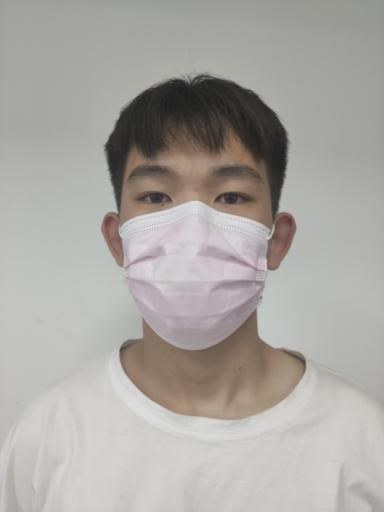

In [105]:
from random import *

i = randint(1,len(traindataset))
img = Image.open(traindataset['img_path'][i])
print(img.filename)
print(img.format)
print(img.size)
print(img.mode)
img